In [87]:
import numpy as np # for linear algebra
import pandas as pd # for Data Merging nd reading files from CSV file
import matplotlib.pyplot as plt # for plotting chart
#import seaborn as sns # for plotting boxplot etc


# For ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import os

In [88]:
base_dir = os.path.join(os.getcwd(), 'archive')
job_postings_df         = pd.read_csv(os.path.join(base_dir,"job_postings.csv"))
companies_df            = pd.read_csv(os.path.join(base_dir,"company_details/companies.csv"))
company_industries_df   = pd.read_csv(os.path.join(base_dir,"company_details/company_industries.csv"))
company_specialities_df = pd.read_csv(os.path.join(base_dir,"company_details/company_specialities.csv"))
employee_counts_df      = pd.read_csv(os.path.join(base_dir,"company_details/employee_counts.csv"))
benefits_df             = pd.read_csv(os.path.join(base_dir,"job_details/benefits.csv"))
job_industries_df       = pd.read_csv(os.path.join(base_dir,"job_details/job_industries.csv"))
job_skills_df           = pd.read_csv(os.path.join(base_dir,"job_details/job_skills.csv"))
salaries_df             = pd.read_csv(os.path.join(base_dir,"job_details/salaries.csv"))
industries_df           = pd.read_csv(os.path.join(base_dir,"maps/industries.csv"))
skills_df               = pd.read_csv(os.path.join(base_dir,"maps/skills.csv"))


In [89]:

num_duplicates_job_posting = job_postings_df['job_id'].duplicated().sum()
num_duplicates_job_posting

0

In [90]:
job_postings_df['job_id'].isnull().sum()

0

In [91]:
all_unique_values = {
    'job_postings': job_postings_df['job_id'].nunique(),
    'companies': companies_df['company_id'].nunique(),
    'company_industries': company_industries_df['company_id'].nunique(),
    'company_specialities': company_specialities_df['company_id'].nunique(),
    'employee_counts': employee_counts_df['company_id'].nunique(),
    'benefits': benefits_df['job_id'].nunique(),
    'job_industries': job_industries_df['job_id'].nunique(),
    'job_skills': job_skills_df['job_id'].nunique(),
    'salaries': salaries_df['job_id'].nunique()
}

all_unique_values

{'job_postings': 33246,
 'companies': 11361,
 'company_industries': 11273,
 'company_specialities': 8354,
 'employee_counts': 11323,
 'benefits': 11647,
 'job_industries': 33090,
 'job_skills': 32422,
 'salaries': 13352}

In [92]:
job_postings_df.head(3)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644


In [93]:
job_postings_df.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33245 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  13352 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

In [94]:
# remove 'inferred' column it makes no use
job_benefits_df = benefits_df.drop('inferred', axis=1)

# combine all the benifits of the same job id
job_benefits_df = job_benefits_df.groupby('job_id')['type'].agg(lambda benifit: ', '.join(benifit)).reset_index()

job_benefits_df

,job_id,type
0,3958427,Medical insurance
1,85008768,"Medical insurance, Vision insurance, Dental in..."
2,133114754,"Medical insurance, 401(k), Vision insurance"
3,529257371,"Medical insurance, Vision insurance, Dental in..."
4,967848246,401(k)
...,...,...
11642,3757935025,"401(k), Vision insurance, Disability insurance"
11643,3757935381,"401(k), Vision insurance"
11644,3757935384,401(k)
11645,3757937004,"Vision insurance, 401(k), Disability insurance"


In [95]:
#Merge Job Posting data with benifits as all benifuts combine above
job_postings_df = pd.merge(job_postings_df, job_benefits_df, on="job_id", how="left")

job_postings_df

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped,type
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101,"Medical insurance, Disability insurance"
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420,NaN
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644,NaN
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461,NaN
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,1.692830e+12,NaN,0,FULL_TIME,NaN,NaN,1,"Medical insurance, 401(k), Vision insurance"
33242,108965123,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,NaN,1.699040e+12,NaN,0,FULL_TIME,NaN,NaN,1699044401,NaN
33243,102339515,52132271.0,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,Greater Boston,...,NaN,NaN,1.699050e+12,NaN,0,FULL_TIME,NaN,NaN,1699063495,NaN
33244,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,1.692750e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,1,"Medical insurance, Vision insurance, Dental in..."


In [96]:
# combine all the skills of the same job id
job_skills_df = job_skills_df.groupby('job_id')['skill_abr'].agg(lambda skill: ', '.join(skill)).reset_index()

job_skills_df

,job_id,skill_abr
0,3958427,"DSGN, ART, IT"
1,85008768,"SALE, BD"
2,102339515,"BD, SALE"
3,108965123,ADM
4,133114754,"SALE, BD"
...,...,...
32417,3757937095,IT
32418,3757938018,"MGMT, MNFC"
32419,3757938019,ENG
32420,3757940025,"MGMT, MNFC"


In [97]:
#Merge Job Posting data with job skills as all skills combine above
job_postings_df = pd.merge(job_postings_df, job_skills_df, on="job_id", how="left")

job_postings_df

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped,type,skill_abr
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101,"Medical insurance, Disability insurance",OTHR
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420,NaN,"MGMT, MNFC"
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644,NaN,ENG
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461,NaN,"MGMT, MNFC"
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346,NaN,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,1.692830e+12,NaN,0,FULL_TIME,NaN,NaN,1,"Medical insurance, 401(k), Vision insurance","SALE, BD"
33242,108965123,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,1.699040e+12,NaN,0,FULL_TIME,NaN,NaN,1699044401,NaN,ADM
33243,102339515,52132271.0,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,Greater Boston,...,NaN,1.699050e+12,NaN,0,FULL_TIME,NaN,NaN,1699063495,NaN,"BD, SALE"
33244,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,1.692750e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,1,"Medical insurance, Vision insurance, Dental in...","SALE, BD"


In [98]:
columns_to_drop=['max_salary','med_salary','min_salary','pay_period','original_listed_time','views','expiry','closed_time','listed_time','work_type','currency','compensation_type','scraped', 'job_posting_url', 'application_url']
job_postings_df=job_postings_df.drop(columns=columns_to_drop)
#Merge Job Posting data with salary dataframe
job_postings_df = pd.merge(job_postings_df, salaries_df, on='job_id', how='left')

# Remove salary_id column, It has no use in job_postings
job_postings_df = job_postings_df.drop(columns = ['salary_id'])

In [99]:
job_industries_df = pd.merge(job_industries_df, industries_df, on='industry_id', how='left')

# Aggregrate all the industry name and id on job_id
job_industries_df = job_industries_df.groupby(['job_id']).agg({
    'industry_id': lambda industryId: ', '.join(map(str, industryId)),
    'industry_name': lambda industryName: ', '.join(map(str, industryName))
}).reset_index()

In [100]:
job_postings_df = pd.merge(job_postings_df, job_industries_df, on='job_id', how='left')

# Remove industry_id column, It has no use
job_postings_df = job_postings_df.drop(columns = ['industry_id'])

In [101]:
companies_df = pd.merge(companies_df, employee_counts_df, on="company_id", how="left")

In [102]:
company_specialities_df = company_specialities_df.groupby('company_id')['speciality'].agg(lambda speciality: ', '.join(speciality)).reset_index()

In [103]:
#Merge Companies data with company specialities
companies_df = pd.merge(companies_df, company_specialities_df, on="company_id", how="left")

In [104]:
# combine all the industries info of the same companyId
company_industries_df = company_industries_df.groupby('company_id')['industry'].agg(lambda industry: ', '.join(industry)).reset_index()

In [105]:

#Merge Companies data with company industry
companies_df = pd.merge(companies_df, company_industries_df, on="company_id", how="left")

In [106]:
columns_to_drop=['zip_code', 'address', 'url', 'time_recorded']
companies_df = companies_df.drop(columns=columns_to_drop)

In [107]:
companies_df.rename(columns={'name': 'company_name',
                             'description': 'company_description',
                             'state': 'company_state',
                             'country': 'company_country',
                             'city': 'company_city',
                             'employee_count': 'company_employee_count',
                             'follower_count': 'company_follower_count',
                             'speciality': 'company_speciality',
                             'industry': 'company_industry'},
                    inplace=True)

In [108]:
job_postings_df = pd.merge(job_postings_df, companies_df, on='company_id', how='left')

In [109]:
columns_to_drop=['job_id', 'company_id', 'applies', 'posting_domain']
job_postings_df = job_postings_df.drop(columns=columns_to_drop)

In [110]:
job_postings_df.rename(columns={'title': 'job_title',
                             'description': 'job_description',
                             'location': 'job_location',
                             'application_type': 'job_application_type',
                             'type': 'job_benefits',
                             'skill_abr': 'job_required_skill_code'},
                    inplace=True)

In [111]:
job_postings_df.describe()

,remote_allowed,sponsored,max_salary,med_salary,min_salary,company_size,company_employee_count,company_follower_count
count,8438.0,66372.000000,2.302100e+04,4492.000000,23021.000000,64084.000000,65671.000000,6.567100e+04
mean,1.0,0.238986,3.986782e+05,28224.205766,61199.125193,5.276496,27091.305493,9.799608e+05
std,0.0,0.426468,4.614034e+07,71770.225867,59205.787753,1.901216,85201.985749,3.824906e+06
min,1.0,0.000000,1.000000e+01,0.000000,7.250000,1.000000,0.000000,0.000000e+00
25%,1.0,0.000000,4.800000e+01,18.000000,38.000000,4.000000,476.000000,2.296750e+04
50%,1.0,0.000000,8.380000e+04,25.000000,60000.000000,6.000000,3372.000000,9.202300e+04
75%,1.0,0.000000,1.422000e+05,4000.000000,100000.000000,7.000000,17782.000000,4.093250e+05
max,1.0,1.000000,7.000090e+09,998426.000000,800000.000000,7.000000,829111.000000,3.188720e+07


In [112]:
job_postings_df.isnull().sum()

job_title                         0
job_description                   4
formatted_work_type               0
job_location                      0
remote_allowed                57934
job_application_type              0
formatted_experience_level    15482
skills_desc                   65921
sponsored                         0
job_benefits                  43714
job_required_skill_code        1554
max_salary                    43351
med_salary                    61880
min_salary                    43351
pay_period                    38859
currency                      38859
compensation_type             38859
industry_name                   546
company_name                    705
company_description             935
company_size                   2288
company_state                   714
company_country                 701
company_city                    702
company_employee_count          701
company_follower_count          701
company_speciality            12172
company_industry            

In [113]:
job_postings_df['formatted_experience_level']

0             Entry level
1                     NaN
2                     NaN
3             Entry level
4        Mid-Senior level
               ...       
66367                 NaN
66368                 NaN
66369                 NaN
66370                 NaN
66371                 NaN
Name: formatted_experience_level, Length: 66372, dtype: object

In [114]:
# Replace Null values with -1 for numericals and for Strings with Unknown and for some column use MODE like currency column
job_postings_df['job_description'] = job_postings_df['job_description'].fillna(value="Unknown")
job_postings_df['remote_allowed'] = job_postings_df['remote_allowed'].fillna(value=-1)
job_postings_df['formatted_experience_level'] = job_postings_df['formatted_experience_level'].fillna(value="Unknown")
job_postings_df['skills_desc'] = job_postings_df['skills_desc'].fillna(value="Unknown")
job_postings_df['job_benefits'] = job_postings_df['job_benefits'].fillna(value="Unknown")
#job_postings_df['job_required_skill_code'] = job_postings_df['job_required_skill_code'].fillna(value="Unknown")
#job_postings_df['max_salary'] = job_postings_df['max_salary'].fillna(value=-1)
#job_postings_df['min_salary'] = job_postings_df['min_salary'].fillna(value=-1)
#job_postings_df['med_salary'] = job_postings_df['med_salary'].fillna(value=-1)
job_postings_df['pay_period'] = job_postings_df['pay_period'].fillna(value="Unknown")
job_postings_df['currency'] = job_postings_df['currency'].fillna(value= job_postings_df['currency'].mode()[0])
job_postings_df['compensation_type'] = job_postings_df['compensation_type'].fillna(value=job_postings_df['compensation_type'].mode()[0])
job_postings_df['industry_name'] = job_postings_df['industry_name'].fillna(value="Unknown")
job_postings_df['company_name'] = job_postings_df['company_name'].fillna(value="Unknown")
job_postings_df['company_description'] = job_postings_df['company_description'].fillna(value="Unknown")
job_postings_df['company_size'] = job_postings_df['company_size'].fillna(value=-1)
job_postings_df['company_state'] = job_postings_df['company_state'].fillna(value="Unknown")
job_postings_df['company_country'] = job_postings_df['company_country'].fillna(value="Unknown")
job_postings_df['company_city'] = job_postings_df['company_city'].fillna(value="Unknown")
job_postings_df['company_employee_count'] = job_postings_df['company_employee_count'].fillna(value=-1)
job_postings_df['company_follower_count'] = job_postings_df['company_follower_count'].fillna(value=-1)
job_postings_df['company_speciality'] = job_postings_df['company_speciality'].fillna(value="Unknown")
job_postings_df['company_industry'] = job_postings_df['company_industry'].fillna(value="Unknown")
job_postings_df['company_size'] = job_postings_df['company_size'].fillna(value="Unknown")

In [198]:
job_postings_df['industry_name']

0                          Medical Equipment Manufacturing
1                       Industrial Machinery Manufacturing
2                       Automation Machinery Manufacturing
3                                 Non-profit Organizations
4        Retail, Manufacturing, Technology, Information...
                               ...                        
66367                                 Truck Transportation
66368                           Retail Apparel and Fashion
66369                                    Consumer Services
66370                                            Insurance
66371                  Personal Care Product Manufacturing
Name: industry_name, Length: 66372, dtype: object

In [199]:
job_postings_df.isnull().sum()

job_title              0
job_description        0
formatted_work_type    0
job_location           0
remote_allowed         0
                      ..
SCI                    0
STRA                   0
SUPL                   0
TRNG                   0
WRT                    0
Length: 5760, dtype: int64

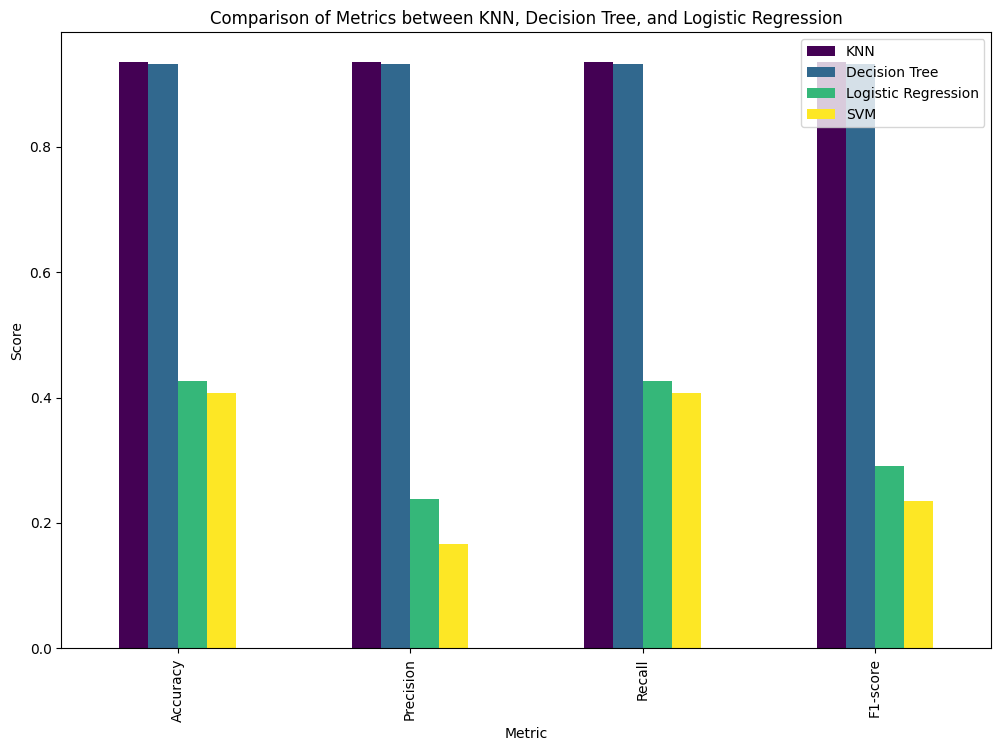

In [140]:
# Features Selection and Target variable selection
X = job_postings_df[['company_employee_count', 'company_follower_count']]
y = job_postings_df['company_size']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a KNN classifier
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='manhattan')

# Train the KNN model
knn.fit(X_train, y_train)

# Predict with KNN
y_pred_knn = knn.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn, recall_knn, fscore_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')

# Define a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt.fit(X_train, y_train)

# Predict with Decision Tree
y_pred_dt = dt.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt, recall_dt, fscore_dt, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='weighted')

# Define a Logistic Regression classifier
lr = LogisticRegression(random_state=42, max_iter=1000)

# Train the Logistic Regression model
lr.fit(X_train, y_train)

# Predict with Logistic Regression
y_pred_lr = lr.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr, recall_lr, fscore_lr, _ = precision_recall_fscore_support(y_test, y_pred_lr, average='weighted')




# Comparison Chart
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'KNN': [accuracy_knn, precision_knn, recall_knn, fscore_knn],
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, fscore_dt],
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, fscore_lr]
})

svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm, recall_svm, fscore_svm, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='weighted')
metrics_df['SVM'] = [accuracy_svm, precision_svm, recall_svm, fscore_svm]


# Plotting
metrics_df.plot(x='Metric', kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Comparison of Metrics between KNN, Decision Tree, and Logistic Regression')
plt.ylabel('Score')
plt.show()

In [205]:
x='f and j'
x.split('and')

['f ', ' j']

In [141]:
job_postings_df['job_required_skill_code']

0                 OTHR
1           MGMT, MNFC
2                  ENG
3           MGMT, MNFC
4                   IT
             ...      
66367         SALE, BD
66368              ADM
66369         BD, SALE
66370         SALE, BD
66371    DSGN, ART, IT
Name: job_required_skill_code, Length: 66372, dtype: object

In [243]:
# encode the categorical data


# get dummies for job_benefits
job_benefits_encoded = job_postings_df['job_benefits'].str.get_dummies(sep=', ')
# get dummies for job_required_skill_code
job_required_skill_code_encoded = job_postings_df['job_required_skill_code'].str.get_dummies(sep=', ')
industry_name = job_postings_df['industry_name'].str.replace('and', ',').str.get_dummies(sep=', ')
# drop nan columns
industry_name = industry_name.drop(columns=['nan'])
X = pd.concat([job_benefits_encoded, job_required_skill_code_encoded, industry_name,
               job_postings_df['company_employee_count'],
               job_postings_df['company_size']], axis=1)

# get mean between max, min and med salary
untrimmed_y = np.mean(job_postings_df.iloc[:, 11:14], axis=1)

untrimmed_y[job_postings_df['pay_period'] == "YEARLY"] *= 1
untrimmed_y[job_postings_df['pay_period'] == "MONTHLY"] *= 12
untrimmed_y[job_postings_df['pay_period'] == "WEEKLY"] *= 50
untrimmed_y[job_postings_df['pay_period'] == "HOURLY"] *= 40 * 50

# Clean dataset to remove unwanted samples
cond = untrimmed_y.notna() & (job_postings_df['pay_period'] != "ONCE")
y = untrimmed_y[cond].reset_index(drop=True)
X = X[cond].reset_index(drop=True)

In [244]:
X.shape

(27512, 321)

In [245]:
X.shape, y.shape

((27512, 321), (27512,))

In [247]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=42)

In [262]:
svr = svm.SVR()
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test[:20])
y_pred, y_test[:20]

(array([82497.18993048, 82497.24345885, 82498.25270294, 82498.93824534,
        82497.18543438, 82498.16442251, 83154.51135377, 82497.3868085 ,
        82499.02534237, 82499.94575557, 82568.28840686, 82499.87835316,
        82499.06174534, 82497.290246  , 82499.95953602, 82499.36587284,
        83661.94962857, 82767.48768291, 82496.51673717, 83276.94040869]),
 array([ 23320.,  40000., 130500.,  85553.,  51281., 160000.,  41000.,
         93920.,  42020., 160000.,  54250.,  40000.,  99216.,  48000.,
        100000., 179550., 139000.,  71500.,  55000., 178100.]))

In [258]:
# Define a KNN classifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error
knn = KNeighborsRegressor(n_neighbors=9, weights='distance', metric='manhattan')

# Train the KNN model
knn.fit(X_train, y_train)

# Predict with KNN
y_pred_knn = knn.predict(X_test)

# Calculate  erorr
median_absolute_error_knn = median_absolute_error(y_test, y_pred_knn)
median_absolute_error_knn


19325.16666666667

In [259]:
knn.predict(X_test[194:200]), y_test[194:200]

(array([ 57500.        , 101127.92630938, 100261.22375   ,  87793.50649351,
         83390.        ,  93505.55555556]),
 array([ 33000. ,  70102.5,  65920. , 110000. ,  52500. ,  96900. ]))

In [260]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = median_absolute_error(y_test, y_pred_dt)
mse_dt

4775.0

In [261]:
dt.predict(X_test[194:200]), y_test[194:200]

(array([ 33000.     ,  70102.5    , 100261.22375, 110000.     ,
         42000.     ,  93845.     ]),
 array([ 33000. ,  70102.5,  65920. , 110000. ,  52500. ,  96900. ]))